In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPool2D,Dense,Flatten,MaxPooling2D
import glob
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import PIL
#VGG16
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Flatten,Dropout
from keras.models import Model

In [3]:
def dataset_prepare(path,label):
    x=[]
    y=[]
    data_path=glob.glob(path+'/*')
    for img_path in data_path:
        img=load_img(img_path,target_size=(227,227))
        img=img_to_array(img)
        img=img/255.0
        x.append(img)
        y.append(label)
        
    return np.array(x),np.array(y)

In [4]:
a02004_x,a02004_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train/02-004',0)
cox8atargeted_x,cox8atargeted_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train/cox8a_targeted',1)
darunavir_x,darunavir_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train/darunavir',2)
hdacinhibitor_x,hdacinhibitor_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train/hdac_inhibitor',3)
leukemia_x,leukemia_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train/leukemia',4)

In [5]:
a02004_x,a02004_y=a02004_x[:800],a02004_y[:800]
cox8atargeted_x,cox8atargeted_y=cox8atargeted_x[:800],cox8atargeted_y[:800]
darunavir_x,darunavir_y=darunavir_x[:800],darunavir_y[:800]
hdacinhibitor_x,hdacinhibitor_y=hdacinhibitor_x[:800],hdacinhibitor_y[:800]
leukemia_x,leukemia_y=leukemia_x[:800],leukemia_y[:800]
print(a02004_x.shape,a02004_y.shape,'02-004')
print(cox8atargeted_x.shape,cox8atargeted_y.shape,'cox8a_targeted')
print(darunavir_x.shape,darunavir_y.shape,'darunavir')
print(hdacinhibitor_x.shape,hdacinhibitor_y.shape,'hdac_inhibitor')
print(leukemia_x.shape,leukemia_y.shape,'leukemia')

(725, 227, 227, 3) (725,) 02-004
(725, 227, 227, 3) (725,) cox8a_targeted
(725, 227, 227, 3) (725,) darunavir
(725, 227, 227, 3) (725,) hdac_inhibitor
(725, 227, 227, 3) (725,) leukemia


In [6]:
x_train=np.concatenate([a02004_x,cox8atargeted_x,darunavir_x,hdacinhibitor_x,leukemia_x],axis=0)
y_train=np.concatenate([a02004_y,cox8atargeted_y,darunavir_y,hdacinhibitor_y,leukemia_y],axis=0)

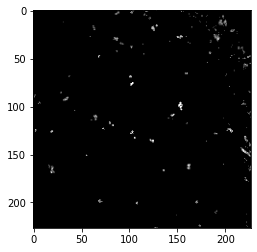

In [7]:
import matplotlib.pyplot as plt

# fig,axs = plt.subplots(1,5 ,figsize = (15,15))

# axs[0].imshow(x_train[0])
# axs[0].imshow(x_train[0])

# axs[1].imshow(x_train[1])
# axs[1].imshow(x_train[1])

# axs[2].imshow(x_train[2])
# axs[2].imshow(x_train[2])

# axs[3].imshow(x_train[3])
# axs[3].imshow(x_train[3])

# axs[4].imshow(x_train[4])
# axs[4].imshow(x_train[4])


plt.imshow(x_train[0])
plt.imshow(x_train[0])


In [8]:
#doing the same for test data
a02004_x_test,a02004_y_test=dataset_prepare("/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test/02-004",0)
cox8atargeted_x_test, cox8atargeted_y_test = dataset_prepare("/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test/cox8a_targeted",1)
darunavir_x_test, darunavir_y_test = dataset_prepare("/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test/darunavir",2)
hdacinhibitor_x_test, hdacinhibitor_y_test = dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test/hdac_inhibitor',3)
leukemia_x_test, leukemia_y_test = dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test/leukemia',4)

In [9]:
x_test=np.concatenate([a02004_x_test,cox8atargeted_x_test,darunavir_x_test,hdacinhibitor_x_test,leukemia_x_test],axis=0)
y_test=np.concatenate([a02004_y_test,cox8atargeted_y_test,darunavir_y_test,hdacinhibitor_y_test,leukemia_y_test],axis=0)

x_test.shape

(1125, 227, 227, 3)

In [10]:
from tensorflow.keras.applications import VGG16

pretrained_model=VGG16(input_shape = (227, 227, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)                  
x = Dense(6, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

# 

58900480/58889256 [==============================] - 1s 0us/step
last layer of vgg : output shape:  (None, 7, 7, 512)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model_vgg.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

history=model_vgg.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/5
114/114 [==============================] - 61s 418ms/step - loss: 0.6003 - acc: 0.7895 - val_loss: 0.2223 - val_acc: 0.9333
Epoch 2/5
114/114 [==============================] - 44s 387ms/step - loss: 0.2250 - acc: 0.9200 - val_loss: 0.1235 - val_acc: 0.9627
Epoch 3/5
114/114 [==============================] - 44s 387ms/step - loss: 0.1470 - acc: 0.9512 - val_loss: 0.0855 - val_acc: 0.9778
Epoch 4/5
114/114 [==============================] - 44s 388ms/step - loss: 0.1122 - acc: 0.9622 - val_loss: 0.0579 - val_acc: 0.9813
Epoch 5/5
114/114 [==============================] - 44s 388ms/step - loss: 0.0852 - acc: 0.9727 - val_loss: 0.0589 - val_acc: 0.9787


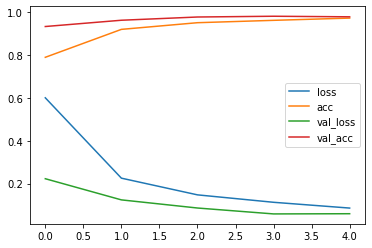

In [12]:
model_loss = pd.DataFrame(model_vgg.history.history)
model_loss.plot()

In [13]:
def dataset_prepare(path,label):
    x=[]
    y=[]
    data_path=glob.glob(path+'/*')
    for img_path in data_path[:50]:
        img=load_img(img_path,target_size=(227,227))
        img=img_to_array(img)
        img=img/255.0
        x.append(img)
        y.append(label)
        
    return np.array(x),np.array(y)

pred_x,pred_y=dataset_prepare('/content/gdrive/MyDrive/ImageClassificationDataSet/seg_pred/seg_pred',0)

In [14]:
predict=model_vgg.predict(pred_x)
predict=np.argmax(predict,axis=1)
labels=['02-004','cox8atargeted','darunavir','hdacinhibitor','leukemia']

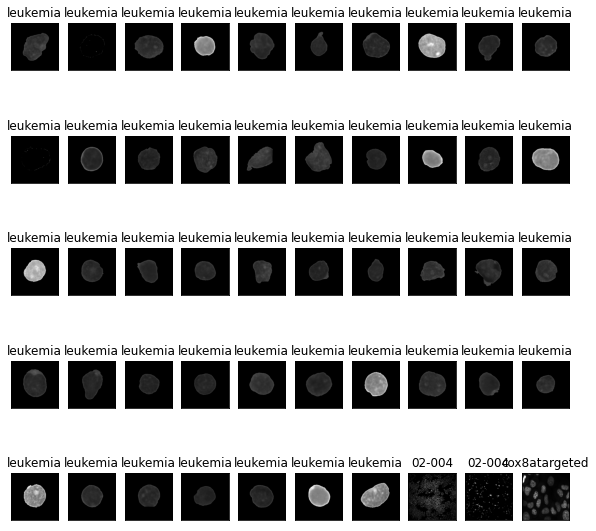

In [19]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(pred_x[i])
    plt.title(labels[predict[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()